In [5]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Preprocess import events_to_df_vert, scale_shift_feats, for_nn
from Models import cnn, lstm, lstm_big, train
from Compare import compareAB

Wall time: 0 ns


In [6]:
%%time
max_ev = int(1e5)
n_constits = 20
sort = "PT"

B_path = "Data/Rave/bb1/run_a0.txt"
S_path = "Data/Rave/dark1/run_a0.txt"

B = events_to_df_vert(B_path, label=0, max_ev=max_ev, n_constits=n_constits, sort=sort)
S = events_to_df_vert(S_path, label=1, max_ev=max_ev, n_constits=n_constits, sort=sort) 

background efficiency =  0.1826589111603967
signal efficiency =  0.596393740077115


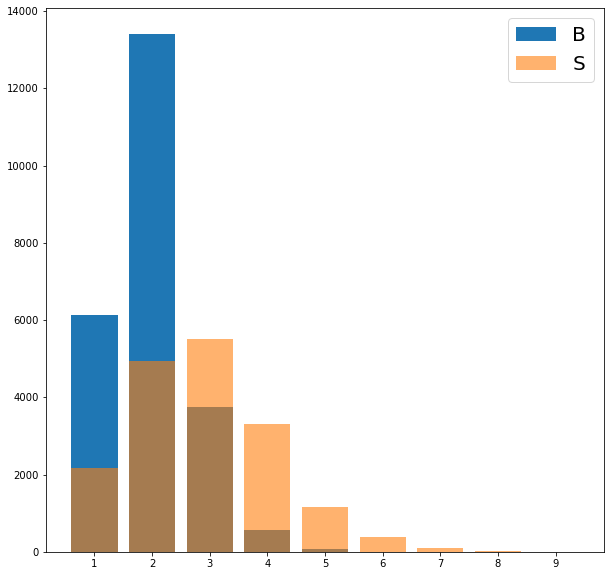

In [49]:
B["n_vert"] = B["vert_mult"].map(np.max)
S["n_vert"] = S["vert_mult"].map(np.max)
B = B.astype({'n_vert':np.int})
S = S.astype({'n_vert':np.int})

labels, counts = np.unique(B.n_vert, return_counts=True)
plt.bar(labels, counts, align='center', alpha = 1)
plt.gca().set_xticks(labels);

labels, counts = np.unique(S.n_vert, return_counts=True)
plt.bar(labels, counts, align='center', alpha=0.6)
plt.gca().set_xticks(labels);

plt.legend(["B","S"],fontsize=20)
plt.gcf().set_size_inches(10,10)

B_eff = B.n_vert[B.n_vert>2].shape[0]/B.shape[0]
S_eff = S.n_vert[S.n_vert>2].shape[0]/S.shape[0]
print("background efficiency = ",B_eff)
print("signal efficiency = ",S_eff)

In [157]:
B["vert_dist"] = (B.vert_x**2 + B.vert_y**2 + B.vert_z**2).map(np.sqrt) 
S["vert_dist"] = (S.vert_x**2 + S.vert_y**2 + S.vert_z**2).map(np.sqrt) 

S['n2'] = S[S.n_vert>=2].vert_mult.map(lambda x: len(np.flatnonzero((x>1.9) & (x<2.1))))
#S['n2'] = S[S.n_vert>=2].vert_mult.map(lambda x: np.flatnonzero(x==2.0)[0])

#plt.hist(B[B.n_vert>=2][['vert_dist', 'n2']].apply(lambda x : x[0][x[1]], axis=0), range = [0,2], histtype="step",hatch="x", density=True);
"""
plt.hist(S[S.n_vert>1].vert_dist.map(lambda x : x[0]), range = [0,2], histtype="step",hatch="x", density=True);
plt.legend(["B","S"],fontsize=20
#plt.yticks([]);
plt.gcf().set_size_inches(10,10)
"""

'\nplt.hist(S[S.n_vert>1].vert_dist.map(lambda x : x[0]), range = [0,2], histtype="step",hatch="x", density=True);\nplt.legend(["B","S"],fontsize=20\n#plt.yticks([]);\nplt.gcf().set_size_inches(10,10)\n'

In [139]:
a = np.array([1,2,4,5,1])
np.flatnonzero(a==9).shape

(0,)

In [160]:
S[(S.n_vert>=2)&(S.n2==0)].head(100)
#B[(B.n_vert>=2)].n2.map(lambda x : x.shape).unique()
#B.loc[810].vert_mult

,Event,Jet,MET,jet_PT,jet_Eta,jet_Phi,track_PT,track_Eta,track_Phi,track_D0,track_DZ,vert_x,vert_y,vert_z,vert_mult,label,n_vert,vert_dist,n2
34,112,2,34.45640,145.280,-0.088205,2.481390,"[6.36942, 4.7147, 4.7147, 4.7147, 4.65181, 4.6...","[-0.107821, -0.242941, -0.242941, -0.242941, -...","[2.66914, 2.4745, 2.4745, 2.4745, 2.2961, 2.59...","[0.741674, 0.0204464, 0.0204464, 0.0204464, 1....","[-0.20058, -0.0719512, -0.0719512, -0.0719512,...","[-0.419051, -0.112053, -0.87075, -4.93166, -4....","[1.08182, -0.0949333, 0.692765, 3.50104, 3.293...","[-0.306127, -0.159588, 0.152913, -1.65742, -0....","[3.0, 5.0, 1.0, 4.0, 6.0, 4.0, 1.0, 1.0, 1.0, ...",1,6,"[1.1998549883756786, 0.21687908152214683, 1.12...",0.0
124,322,2,13.22550,143.410,0.446051,-0.592664,"[8.18543, 5.60454, 5.4691, 5.03548, 5.03548, 4...","[0.45571, 0.509058, 0.454567, 0.440946, 0.4409...","[-0.621797, -0.633706, -0.438685, -0.596309, -...","[0.0463675, 0.489331, 0.595151, 0.26298, 0.262...","[0.0985296, -0.386847, -0.136584, -0.0548733, ...","[1.02929, 4.56708, 4.56708, 4.56708, 1.02929, ...","[-0.651197, -2.80471, -2.80471, -2.80471, -0.6...","[0.667607, 2.38994, 2.38994, 2.38994, 0.667607...","[1.0, 3.0, 3.0, 3.0, 1.0, 3.0, 1.0, 5.0, 1.0, ...",1,5,"[1.3889544785046053, 5.868256224305479, 5.8682...",0.0
423,1172,2,3.93574,149.823,0.439592,-0.835993,"[11.1509, 7.64466, 5.86417, 5.49429, 5.30282, ...","[0.531712, 0.321974, 0.0379507, 0.449333, 0.34...","[-0.535012, -0.632771, -1.24529, -0.406988, -0...","[0.0140214, 0.00770653, 0.00629826, 0.0210463,...","[0.00629949, 0.157852, 0.0654352, -0.075679, 0...","[0.0899428, 0.0899428, 0.0899428, 0.0899428, 0...","[-0.0844365, -0.0844365, -0.0844365, -0.084436...","[0.0754331, 0.0754331, 0.0754331, 0.0754331, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1,3,"[0.14460076894574247, 0.14460076894574247, 0.1...",0.0
850,2372,1,6.62372,156.947,0.100294,1.703500,"[12.279, 10.4508, 7.67361, 5.07393, 4.34281, 4...","[-0.0676943, -0.0202701, 0.413874, -0.284251, ...","[1.93993, 1.92843, 1.44071, 1.30773, 2.02093, ...","[0.0278382, 0.0633785, 0.00432423, 0.284261, 0...","[-0.016239, -0.0645316, -0.0370732, 1.34516, -...","[-0.13927, -0.13927, 0.0631404, 7.89842, 0.063...","[0.256268, 0.256268, 0.523316, 28.0063, 0.5233...","[-0.0753831, -0.0753831, 0.0791671, -7.04322, ...","[3.0, 3.0, 1.0, 5.0, 1.0, 3.0, 1.0, 1.0, 3.0, ...",1,5,"[0.30125078006473277, 0.30125078006473277, 0.5...",0.0
1164,3242,2,10.81040,140.564,-1.065720,1.158370,"[9.4044, 9.4044, 9.27347, 6.6772, 5.67634, 4.9...","[-0.850073, -0.850073, -0.727897, -0.978967, -...","[1.34042, 1.34042, 1.00646, 1.40265, 1.04821, ...","[0.0285377, 0.0285377, 0.0658157, 0.0694395, 0...","[-0.296197, -0.296197, -0.0943075, 0.0421011, ...","[0.0898493, 0.168827, 0.0898493, 0.0898493, 0....","[0.184519, 0.788566, 0.184519, 0.184519, 0.184...","[-0.271506, -1.08262, -0.271506, -0.271506, -0...","[1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1,3,"[0.340346391353706, 1.3499647983132745, 0.3403...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16398,46567,1,17.45940,150.088,0.578874,0.873207,"[14.7682, 9.51665, 7.29261, 5.70414, 3.4118, 2...","[0.455792, 0.670123, 0.796757, 0.767823, 0.295...","[0.901252, 0.819374, 0.758075, 0.842525, 0.873...","[0.102821, 0.031549, 0.0754404, 0.166383, 0.10...","[-0.129385, 0.12566, -0.0320694, -0.0494053, 0...","[0.976539, 0.470568, 0.470568, 0.470568, 0.470...","[1.0678, 0.391082, 0.391082, 0.391082, 0.39108...","[0.551086, 0.492221, 0.492221, 0.492221, 0.492...","[4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, ...",1,4,"[1.5483930502030163, 0.7852775854365129, 0.785...",0.0
16451,46721,2,16.66370,158.812,-2.148390,3.016850,"[12.0307, 9.56314, 6.61032, 5.9975, 5.81377, 5...","[-2.23984, -2.16664, -1.92884, -2.26583, -2.27...","[3.09751, 3.05148, -3.12834, 2.79594, 3.04599,...","[0.14776, 0.379506, 0.02734, 0.894612, 0.30585...","[5.65613, 2.22909, -0.329139, 0.950066, 0.2947...","[-9.71209, -9.71209,

In [118]:
a = lambda x,y : x+y
a(2,3)

5

In [100]:
a = np.array([1,2,9,5,1])
print()

[]


In [4]:
j1[j1.Jet==1].head(3)

,Event,Jet,MET,jet_PT,jet_Eta,jet_Phi,track_PT,track_Eta,track_Phi,track_DeltaR,track_PID,track_D0,track_DZ,track_errD0,track_errDZ,Charge,label
1,2,1,40.6203,156.246,0.711259,2.395520,"[31.7769, 24.7433, 13.241, 6.01747, 2.55923, 0...","[0.716798, 0.727803, 0.716285, 0.723045, 0.689...","[2.3971, 2.38298, 2.39691, 2.36813, 2.25307, 0...","[0.00576117, 0.0207545, 0.00521603, 0.0298175,...","[321.0, -211.0, 211.0, -321.0, 211.0, 0.0, 0.0...","[-0.0386863, -0.0160853, 0.0614451, -0.069298,...","[0.049211, -0.0462333, 0.114672, 0.0138826, -0...","[0.0200087, 0.0210738, 0.0225769, 0.057738, 0....","[0.035, 0.035, 0.035, 0.0776417, 0.104879, 0.0...","[1.0, -1.0, 1.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0...",0
2,4,1,10.9612,146.883,-0.618444,-2.485670,"[15.6784, 11.824, 9.75391, 7.84842, 7.70134, 7...","[-0.613276, -0.607632, -0.598817, -0.591783, -...","[-2.4687, -2.47467, -2.4805, -2.39173, -2.4380...","[0.0177443, 0.015424, 0.0202967, 0.0976507, 0....","[-211.0, 211.0, -321.0, 211.0, -211.0, 211.0, ...","[-0.0292481, -0.0542348, -0.0261624, 1.05176, ...","[-0.0344169, -0.148685, -0.00210626, -0.412155...","[0.0212926, 0.0217777, 0.0224228, 0.0375934, 0...","[0.0345485, 0.0348582, 0.0316432, 0.0492338, 0...","[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1....",0
6,13,1,70.0995,148.972,0.307656,0.657164,"[25.191, 16.0247, 13.6971, 10.6429, 4.32376, 3...","[0.322425, 0.309264, 0.248053, 0.286772, 0.296...","[0.602996, 0.687066, 0.636094, 0.636062, 0.633...","[0.0561456, 0.0299451, 0.0632174, 0.0296887, 0...","[-211.0, -211.0, -321.0, 211.0, 211.0, -211.0,...","[-0.244949, -0.00406774, 0.102736, 0.142773, 0...","[-0.345783, -0.0042972, 0.37, 0.069454, 0.0738...","[0.0184754, 0.019382, 0.0196338, 0.0199192, 0....","[0.035, 0.035, 0.0397949, 0.0399547, 0.0779604...","[-1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1...",0


In [6]:
j1["mult"] = j1["track_PT"].map(lambda x: x.nonzero()[0].shape[0])
j2["mult"] = j2["track_posx"].map(lambda x: x.nonzero()[0].shape[0])

In [11]:
j2["track_PT"] = ((np.power(j2.track_momx,2)+np.power(j2.track_momy,2))*np.power(j2.Charge,2)).map(np.sqrt)
j2["track_DZ"] = j2.track_posz*10
j2["track_D0"] = ((np.power(j2.track_posx,2)+np.power(j2.track_posy,2))*100).map(np.sqrt)

j2["track_Theta"] = j2[["track_PT", "track_momz", "Charge"]].apply(lambda x: np.arctan2(x.track_PT,x.track_momz*x.Charge), axis=1)
j2["track_Eta"] = -((0.5*j2.track_Theta).map(np.tan)).map(np.log)
def InfToZero(x):
    x = x.copy()
    x[(x==np.inf) | (x==-np.inf)] = 0
    return x
j2["track_Eta"] = j2.track_Eta.map(InfToZero)

j2["track_Phi"] = j2[["track_momx", "track_momy", "Charge"]].apply(lambda x: np.arctan2(x.track_momy*x.Charge,x.track_momx*x.Charge), axis=1)

c:\users\noamw\desktop\jet_tagging\venv\lib\site-packages\pandas\core\base.py:1145: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)


In [24]:
i = 52
feat = "track_PT"

a = np.sort(j1[feat][i])
b = np.sort(j2[feat][i])

print(a)
print(b)

[ 0.        0.        0.        0.        0.        0.        0.
  0.        0.357961  0.912883  1.44703   1.52516   1.58337   2.55985
  3.03988   3.12861   7.20754   9.06339  19.7729   39.9355  ]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.35796101  1.44703487  1.52516064  1.58336593  3.03988431  7.20754477
  9.06339226 39.93551633]
